<h1>Hypothesis Testing</h1>

As we saw in the lecture, in a statistical hypothesis testing we have a statement called the null hypothesis that assumes nothing interesting is going on between the variable you are testing. 

With is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely to happen given the data, you reject the null in favor of the alternative hypothesis. We are usually interested in the alternative hypothesis: something interesting is going on.

Once you have the null and alternative hypothesis written down, you choose a significance level, denoted by the Greek letter α (alpha). The significance level is a probability threshold that determines when you reject the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.

<h2>One-Sample T-Test</h2>

In the one sample t-test we want to determine whether a sample of observations could have been generated from a population with a specific mean. 

In this test the hypothesis have the form:

H<sub>0</sub>= mu </br>

H<sub>a</sub> ≠ mu

Suppose we are interested in determining whether the average GPA of our school is significantly different from 3. In this case our hypothesis are:

H<sub>0</sub>= 3;</br>

H<sub>a</sub> ≠ 3

α = 0.05

And we want to use a significance level of 0.05, meaning the chances to have a sample with a mean different from 3 even though it is truly 3 is 5% (type I error).

In [4]:
import pandas as pd

#Reading the SAT dataset
sat_filename = "./data/GPA_SAT_Dataset.csv"
sat_ds = pd.read_csv(sat_filename, sep=',', decimal='.',header = 0)

In [5]:
print (sat_ds.mean())

Id           13.000
Salary    32960.000
GPA           3.024
Major         1.960
SAT        1194.000
dtype: float64


<h3>Checking Assumptions</h3>
This is a parametric procedures that makes certain assumptions:

<ol>
<li>The variable must be continuous: continous values can take any value within a range.</li>
<li>The observations are independend of one another: hard to test and usually not testable.</li>
<li>The variable is approximately normally distributed: check the shape of the distribution</li>
<li>The variable has no outliers: outliers are extreme values</li>
</ol>

<h4>Checking the gpa variable is continuous</h4>
Yes, this variable is in a decimal format and can take values from 0 to 4.

<h4>Checking the gpa variable is approximately normally distributed</h4>
We will use the plot technique learned from the lab.

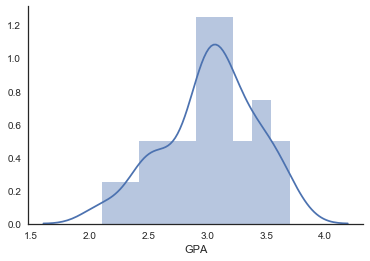

In [9]:
import seaborn as sns

# We need to have this strange inclusion %Matplotlib inline in order to display the plot in a notebook
%matplotlib inline
sns.set_style(style='white')
sns.distplot(sat_ds["GPA"],bins=10)

# Remove the top and right borders - Must come after the graph
sns.despine()

As we can see, even if with a little skewness, we can consider this distribution approximately normal (consider we only have 25 observations). Also, because the range of the GPA variable is from 0.0 to 4.0, we can automatically exclude outliers. Anything outside from this range is really an error.

Ok, we have checked our assumption and we can proceed with the t-test.

In [11]:
import scipy.stats as stats

stats.ttest_1samp(a=sat_ds["GPA"], popmean=3.0)


Ttest_1sampResult(statistic=0.30457114391380524, pvalue=0.76331819904015463)

The test result shows the test statistic "t" is equal to 0.304 which tells us how much the sample mean deviates from the null hypothesis.</br>

The associated p-value = 0.763 and p>α. Therefore, we do not reject the null-hypothesis and we can say, that the mean of the sample is not significanly different from 3.0. 

<h3>Exercise</h3>

Suppose we are interested in determining whether the average mpg (miles per gallon) of our cars sample is 20.<br/> 
For this exercise use the "auto-mpg.cvs" file and the "mpg" variable.

<h4>In this case what are the hypothesis?</h4>
Write the hypothesis down.

Use a significance level of 0.05

α = 0.05

<h4>Write the python program that test for this hypothesis. What is the result? Are you accepting or rejecting the hypothesis?</h4>

<h3>Two-Sample T-Test</h3>
In this case we want to test whether the means of two indipendent data samples are significantly different.</br>

For example, lets consider the car dataset and let's study whether or not the mileage is different from the two population of 4 and 6 cilinder cars.</br>

In this case the hypothesis are:</br>

H<sub>0</sub>: μ<sub>cyl=4</sub>= μ<sub>cyl=6</sub></br>

H<sub>a</sub>: μ<sub>cyl=4</sub>≠ μ<sub>cyl=6</sub></br>

Also in this case we use the traditional α = 0.05

<u><b>In this test, we have an extra assumption: the two populations must have identical variances by default. If the two population have significant different variance, then we would use the Welch's t-test that does not assume equal population variance.</b></u>

min:  9.0
Max:  46.6
Range:  37.6


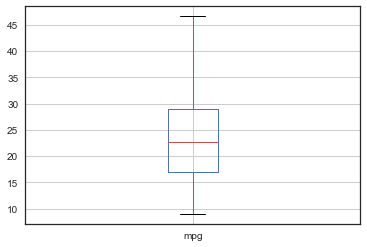

In [19]:
#Reading the mpg dataset
car_filename = "./data/auto-mpg.csv"
car_ds = pd.read_csv(car_filename, sep=',', decimal='.',header = 0)

minimum = car_ds["mpg"].min()
maximum = car_ds["mpg"].max()
rangeMPG = maximum-minimum

print ("min: ", minimum)
print ("Max: ", maximum)
print ("Range: ",rangeMPG)
car_ds.boxplot(column='mpg')

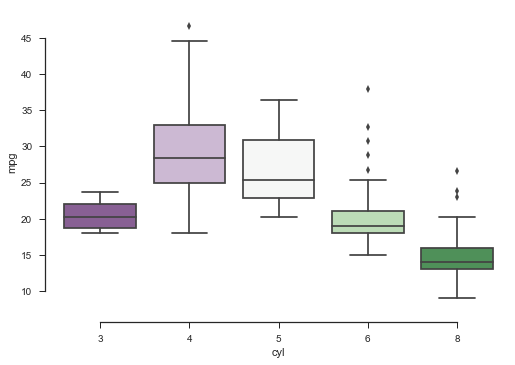

In [22]:
# The same boxplot using the seaborn library
sns.set(style="ticks")

# Draw a nested boxplot to show mpg and cylinders. Note, there is no overlap between 4 & 6 cylinders
sns.boxplot(x="cyl", y="mpg", data=car_ds, palette="PRGn")
sns.despine(offset=10, trim=True)

<h4>Checking the gpa variable is continuous</h4>
Yes, this variable is in a decimal format and can take values from 9 to 46.6 and the value of 46.6 might be an outlier which will be removed from further analysis as it is a single value higher from any other value in the dataset, independently from the number of cylinders.</br>

We create a new dataset that contains all rows with the exception of mpg=46.6 and check the box plot again.

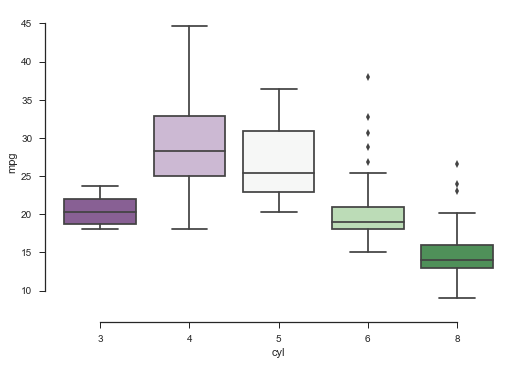

In [25]:
car_clean = car_ds[car_ds.mpg != 46.6]

# Draw boxplots to show miles date over cylinders. 
sns.boxplot(x="cyl", y="mpg", data=car_clean, palette="PRGn")
sns.despine(offset=10, trim=True)

The boxplot looks good now.

<h4>Checking the gpa variable is approximately normally distributed</h4>
Again, a little bit skewed, but we could consider approximately normal.</br>

We also assume the two populations have the same variance (How do you check for that?)

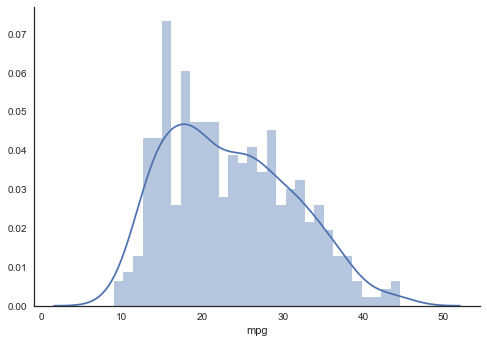

In [29]:
sns.set_style(style='white')
sns.distplot(car_clean["mpg"],bins=30)

# Remove the top and right borders - Must come after the graph
sns.despine()

<h3>Executing the test</h3>
Let's now execute the two sample t-test.

In [42]:
ds_4cyl = car_ds[car_ds.cyl == 4]
ds_6cyl = car_ds[car_ds.cyl == 6]

19.973493975903615

In [41]:
ds_4cyl.head(5)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls


ds_6cyl.head(5)

In [43]:
#Display the means
cyl4_mean = ds_4cyl["mpg"].mean()
cyl6_mean = ds_6cyl["mpg"].mean()

print ("4 Cyl (Mean):", cyl4_mean)
print ("6 Cyl (Mean):", cyl6_mean)

4 Cyl (Mean): 29.283919597989957
6 Cyl (Mean): 19.973493975903615


In [45]:
stats.ttest_ind(ds_4cyl["mpg"],ds_6cyl["mpg"])

Ttest_indResult(statistic=13.704896898546142, pvalue=4.6176516348996581e-33)

Because the two variances are probably different, we should use the Welch's test

In [39]:
stats.ttest_ind(ds_4cyl["mpg"],ds_6cyl["mpg"], equal_var=False)

Ttest_indResult(statistic=16.009512599181818, pvalue=6.2448622576436035e-39)

As we can see, the p-value is way smaller than 0.05 and consequently p<α we reject the null hypothesis and say: "We have a statistically significant evidence to believe 4 cylinders cars have, on average, more mpg when compared to 6 cylindars.